<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Run-Details" data-toc-modified-id="Run-Details-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Run Details</a></span></li><li><span><a href="#Initialisations" data-toc-modified-id="Initialisations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Initialisations</a></span><ul class="toc-item"><li><span><a href="#Fill-in-the-details-here" data-toc-modified-id="Fill-in-the-details-here-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Fill in the details here</a></span></li><li><span><a href="#Mean-Values-in-different-type-of-channel" data-toc-modified-id="Mean-Values-in-different-type-of-channel-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Mean Values in different type of channel</a></span></li></ul></li><li><span><a href="#Defining-functions-for-widgets" data-toc-modified-id="Defining-functions-for-widgets-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Defining functions for widgets</a></span></li><li><span><a href="#Scatter-Plots-of-final-values" data-toc-modified-id="Scatter-Plots-of-final-values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Scatter Plots of final values</a></span></li><li><span><a href="#Saving-Figures" data-toc-modified-id="Saving-Figures-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Saving Figures</a></span><ul class="toc-item"><li><span><a href="#Time-series-of-scatter-Plots" data-toc-modified-id="Time-series-of-scatter-Plots-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Time series of scatter Plots</a></span></li><li><span><a href="#Saving-Node-Number-Evolutions" data-toc-modified-id="Saving-Node-Number-Evolutions-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Saving Node Number Evolutions</a></span></li><li><span><a href="#Saving-Kappa-Theta-plots" data-toc-modified-id="Saving-Kappa-Theta-plots-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Saving Kappa Theta plots</a></span></li><li><span><a href="#Mean-in-Different-Channels" data-toc-modified-id="Mean-in-Different-Channels-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Mean in Different Channels</a></span></li><li><span><a href="#Saving-log-plots" data-toc-modified-id="Saving-log-plots-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Saving log plots</a></span></li></ul></li><li><span><a href="#Property-Evolution-channel-wise" data-toc-modified-id="Property-Evolution-channel-wise-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Property Evolution channel wise</a></span><ul class="toc-item"><li><span><a href="#Evolution-of-last-few-steps" data-toc-modified-id="Evolution-of-last-few-steps-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Evolution of last few steps</a></span></li><li><span><a href="#Staggered-Evolution" data-toc-modified-id="Staggered-Evolution-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Staggered Evolution</a></span></li><li><span><a href="#Final-Time-Spatial-Plots" data-toc-modified-id="Final-Time-Spatial-Plots-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Final Time Spatial Plots</a></span></li><li><span><a href="#Spatial-Plots-of-properties-for-different-Runs" data-toc-modified-id="Spatial-Plots-of-properties-for-different-Runs-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Spatial Plots of properties for different Runs</a></span><ul class="toc-item"><li><span><a href="#Last-few-Steps-Spatial-Scatter-Plots" data-toc-modified-id="Last-few-Steps-Spatial-Scatter-Plots-7.4.1"><span class="toc-item-num">7.4.1&nbsp;&nbsp;</span>Last few Steps Spatial Scatter Plots</a></span></li><li><span><a href="#Staggered-Spatial-Property-PLots" data-toc-modified-id="Staggered-Spatial-Property-PLots-7.4.2"><span class="toc-item-num">7.4.2&nbsp;&nbsp;</span>Staggered Spatial Property PLots</a></span></li><li><span><a href="#Special-Plots" data-toc-modified-id="Special-Plots-7.4.3"><span class="toc-item-num">7.4.3&nbsp;&nbsp;</span>Special Plots</a></span></li></ul></li></ul></li><li><span><a href="#Ignore" data-toc-modified-id="Ignore-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Ignore</a></span></li></ul></div>

This file is used to post process the data. It has sections to generate all kinds of different plots. Some of these plots might or might not be useful depending on the type of simulation run. Some of these plots might or might not work with all kinds of data. 

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import copy
from mpl_toolkits import mplot3d
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from scipy.interpolate import make_interp_spline, BSpline, interp1d
from scipy.optimize import curve_fit, least_squares
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors

%matplotlib notebook
#%matplotlib inline

# Run Details

{Kap_min, Kap_max, The_min, The_max, Runs, L, tmax, t_savestart, t_jump}

In [3]:
kap_the = {'0030': [3.0,4.0,0.0,1.0,20],\
           '0031': [-4.0, -3.0, 0.0, 1.0,20],\
           '0032' : [-4.0, -3.0, 0.0, 0.1,20],\
           '0033' : [-4.0, -3.0, 0.9, 1.0,20],\
          '0034' : [3.0, 4.0, 0.9, 1.0,20],\
          '0035' : [3.0, 4.0, 0.0,0.1,20],\
          '0036' : [-4.0,4.0,0.0,0.1,20], \
          '0037' : [-4.0, 4.0, 0.9, 1.0,18],\
           '0038' : [-4.0, 4.0, 0.0, 1.0,50],\
           '0030b': [3.0,4.0,0.0,1.0,10],\
           '0031b': [-4.0, -3.0, 0.0, 1.0,10],\
           '0032b' : [-4.0, -3.0, 0.0, 0.1,10],\
           '0033b' : [-4.0, -3.0, 0.9, 1.0,10],\
          '0034b' : [3.0, 4.0, 0.9, 1.0,10],\
          '0035b' : [3.0, 4.0, 0.0,0.1,10],\
          '0036b' : [-4.0,4.0,0.0,0.1,10], \
          '0037b' : [-4.0, 4.0, 0.9, 1.0,10],\
           '0038b' : [-4.0, 4.0, 0.0, 1.0,10],\
          '0041' : [-8.0, -8.0, 0.1, 0.1, 5],\
          '0041b' : [-8.0, -8.0, 0.1, 0.1, 5],\
          '0042' : [-8.0, -8.0, 1.2, 1.2, 5],\
          '0042b' : [-8.0, -8.0, 1.2, 1.2, 5], \
          '0038c' : [-4.0, 4.0, 0.0, 1.0, 5], \
           '0060' : [-4.0, -4.0, 0.0, 0.0, 3],\
           '0061' : [-4.0, -4.0, 0.5, 0.5, 3],\
           '0062' : [-4.0, -4.0, 1.0, 1.0, 3],\
           '0063' : [-8.0, -8.0, 0.0, 0.0, 3],\
           '0064' : [-8.0, -8.0, 0.1, 0.1, 3],\
           '0065' : [-8.0, -8.0, 1.0, 1.0, 3],\
           '0066' : [-4.0, -4.0, 0.0, 1.0, 3],\
           '0067' : [-8.0, -8.0, 0.0, 1.0, 3],\
           '0068' : [4.0, 4.0, 0.0, 1.0, 2],\
           '0069' : [8.0, 8.0, 0.0, 1.0, 3],\
           '0070' : [-8.0, 8.0, 0.0, 0.0, 3],\
           '0071' : [-8.0, 8.0, 0.5, 0.5, 3],\
           '0072' : [-8.0, 8.0, 1.0, 1.0, 3],\
           '0073' : [-8.0, 8.0, 0.25, 0.25, 3],\
           '0074' : [-8.0, 8.0, 0.75, 0.75, 3],\
           '0075' : [0.0, 0.0, 0.5, 0.5, 3],\
           '0076' : [-8.0, 8.0, 0.0, 1.0, 3],\
           '0030s':[3.0,4.0,0.0,1.0,5],\
           '0031s':[-4.0, -3.0, 0.0, 1.0,5],\
           '0032s':[-4.0, -3.0, 0.0, 0.1,5],\
           '0033s':[-4.0, -3.0, 0.9, 1.0,5],\
           '0034s':[3.0, 4.0, 0.9, 1.0,5],\
           '0035s':[3.0, 4.0, 0.0,0.1,5],\
           '0036s':[-4.0,4.0,0.0,0.1,5], \
           '0037s':[-4.0, 4.0, 0.9, 1.0,5],\
           '0038s':[-4.0, 4.0, 0.0, 1.0,5]\
          }
#some problems with run 19 and 20 for '0037'        

# Initialisations
## Fill in the details here

In [4]:
strID = '0075'
Runs = int(kap_the[strID][4])
with open("output/Evolution Attempt 2 "+ strID +"/Run 1/"+ strID + "Theta Mean.csv","r") as f:
    reader = csv.reader(f,delimiter = ",")
    data = list(reader)
    timesteps = len(data)

In [5]:
kappa_ini = np.linspace(kap_the[strID][0],kap_the[strID][1],40)
theta_ini = np.linspace(kap_the[strID][2],kap_the[strID][3],40)
kap_ini,the_ini = np.meshgrid(kappa_ini, theta_ini)
kap_ini = np.squeeze(kap_ini)
the_ini = np.squeeze(the_ini)

In [ ]:
kappa_mean = np.zeros([Runs, timesteps])
theta_mean = np.zeros([Runs, timesteps])

node_numbers = np.zeros([Runs, timesteps])
node_numbers_vel = np.zeros([Runs, timesteps])
node_numbers_rest = np.zeros([Runs, timesteps])


In [ ]:
for run in range(Runs):
    kappa_mean[run] = np.genfromtxt("output/Evolution Attempt 2 "+ strID + "/Run " + str(run + 1) + "/" + strID + "Kappa Mean.csv", delimiter = ", " )
    theta_mean[run] = np.genfromtxt("output/Evolution Attempt 2 "+ strID + "/Run " + str(run + 1) + "/" + strID + "Theta Mean.csv", delimiter = ", " )
    node_numbers[run] = np.genfromtxt("output/Evolution Attempt 2 "+ strID + "/Run " + str(run + 1) + "/" + strID + "Nodes Filled.csv", delimiter = ", " )
    node_numbers_vel[run] = np.genfromtxt("output/Evolution Attempt 2 "+ strID + "/Run " + str(run + 1) + "/" + strID + "Velocity Nodes Filled.csv", delimiter = ", " )
    node_numbers_rest[run] = np.genfromtxt("output/Evolution Attempt 2 "+ strID + "/Run " + str(run + 1) + "/" + strID + "Rest Nodes Filled.csv", delimiter = ", " )


## Mean Values in different type of channel

In [ ]:
kappa_mean_vel = np.zeros([Runs, timesteps])
theta_mean_vel = np.zeros([Runs, timesteps])
kappa_mean_rest = np.zeros([Runs, timesteps])
theta_mean_rest = np.zeros([Runs, timesteps])
for run in range(Runs):
    kappa_mean_vel[run] = np.genfromtxt("output/Evolution Attempt 2 "+ strID + "/Run " + str(run + 1) + "/" + strID + "Kappa Mean Vel.csv", delimiter = ", " )
    theta_mean_vel[run] = np.genfromtxt("output/Evolution Attempt 2 "+ strID + "/Run " + str(run + 1) + "/" + strID + "Theta Mean Vel.csv", delimiter = ", " )
    kappa_mean_rest[run] = np.genfromtxt("output/Evolution Attempt 2 "+ strID + "/Run " + str(run + 1) + "/" + strID + "Kappa Mean Rest.csv", delimiter = ", " )
    theta_mean_rest[run] = np.genfromtxt("output/Evolution Attempt 2 "+ strID + "/Run " + str(run + 1) + "/" + strID + "Theta Mean Rest.csv", delimiter = ", " )

# Defining functions for widgets

# Scatter Plots of final values

In [ ]:
final_time = timesteps
"""
kap_f = np.zeros(Runs+1)
the_f = np.zeros(Runs+1)
nodes_f = np.zeros(Runs+1)
front_f = np.zeros(Runs+1)
nodes_f[0], front_f[0] = 1, 0
"""
kap_f, the_f = kappa_mean[:,final_time-1], theta_mean[:,final_time-1]

nodes_f, front_f = node_numbers[:,final_time-1], node_numbers_vel[:, final_time-1]


In [ ]:
plt.ion()
plt.figure()
plt.scatter(kap_f, the_f, c = nodes_f, cmap='viridis', s=nodes_f/1.5, linewidth=0, alpha=0.2)
plt.colorbar(label='Total Nodes')
plt.scatter(kap_f, the_f, alpha = 0.5)
plt.xlabel('Kappa')
plt.ylabel('Theta')
plt.xlim([-8,6])
plt.ylim([-2,1.5])
plt.title('Mean Kappa and Theta at time: ' + str(final_time-1))
plt.legend(title = 'Radius = Total Number of Nodes')
plt.scatter(kap_ini, the_ini, alpha=0.005)
for run in range(Runs):
    plt.annotate(str(run+1), (kap_f[run], the_f[run]))

# Saving Figures

## Time series of scatter Plots

In [ ]:
plt.ioff()
if(timesteps < 1000):
    dt = 1
else:
    dt = 20
    
timedif = int(timesteps/dt)+1
for time in range(timedif):
    f = plt.figure()
    plt.scatter(kappa_mean[:,dt*time], theta_mean[:,dt*time], c = node_numbers[:,dt*time], cmap='viridis', s=node_numbers[:,dt*time]/2.0, linewidth=0, alpha=0.2)
    plt.colorbar(label='Total Nodes')
    plt.scatter(kappa_mean[:,dt*time], theta_mean[:,dt*time], alpha = 0.5)
    plt.xlabel('Kappa')
    plt.ylabel('Theta')
    plt.xlim([-11,6])
    #plt.xlim([-9,6])
    plt.ylim([-2,1.5])
    plt.title('Mean Kappa and Theta at time: ' + str(dt*time))
    plt.legend(title = 'Radius = Total Number of Nodes')
    plt.scatter(kap_ini, the_ini, alpha=0.005)
    plt.grid(which='both')
    for run in range(Runs):
        plt.annotate(str(run+1), (kappa_mean[run,dt*time], theta_mean[run,dt*time]))
    plt.savefig('output/Evolution Attempt 2 '+ strID + '/Pictures/Mean_kt_scatter/' + str(dt*time) + '.jpg', dpi=200)
    #plt.savefig('output/Evolution Attempt 2 '+ strID + '/Pictures/Mean_kt_scatter/GIF/' + str('{0:04}'.format(dt*time)) + '.jpg', dpi=200)
    f.clear()
    plt.close(f)

## Saving Node Number Evolutions

In [ ]:
plt.ioff()
colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',\
 'black', 'lime', 'royalblue', 'tomato', 'goldenrod', 'gold', 'maroon', 'tan', 'steelblue', 'silver']

#defing spline properties

f = plt.figure()
for run in range(Runs):
    plt.plot(node_numbers[run,:], label = 'Run %s' %(run+1),c=colours[run] )
plt.title('All Channels')
plt.ylabel('Number of cells')
plt.xlabel('time')
plt.gca().legend(loc='center left', bbox_to_anchor=(0, 0.70), ncol = 2)
plt.savefig('output/Evolution Attempt 2 '+ strID + '/Pictures/node_numbers.jpg', dpi=200)
f.clear()
plt.close(f)

f = plt.figure()
for run in range(Runs):
    plt.plot(node_numbers_vel[run,:],label = 'Run %s' %(run+1),linewidth=0.5, c=colours[run] )
plt.title('Velocity Channels')
plt.ylabel('Number of Cells in velocity channels')
plt.xlabel('time')
plt.gca().legend(loc='center left', bbox_to_anchor=(0, 70), ncol = 2)
plt.savefig('output/Evolution Attempt 2 '+ strID + '/Pictures/node_numbers_vel.jpg', dpi=200)
f.clear()
plt.close(f)

f = plt.figure()
for run in range(Runs):
    plt.plot(node_numbers_rest[run,:],label = 'Run %s' %(run+1),c=colours[run])
plt.title('Rest Channels')
plt.ylabel('Number of cells in rest channels')
plt.xlabel('time')
plt.gca().legend(loc='center left', bbox_to_anchor=(0, 70), ncol = 2 )
plt.savefig('output/Evolution Attempt 2 '+ strID + '/Pictures/node_numbers_rest.jpg', dpi=200)
f.clear()
plt.close(f)



## Saving Kappa Theta plots

In [ ]:

f = plt.figure()
for run in range(Runs):
    plt.plot(kappa_mean[run, :], label = 'Run %s' %str(run+1), c=colours[run])
plt.gca().legend(loc='lower left', bbox_to_anchor=(0, 0), ncol=2)
plt.title('Mean Kappa')
plt.ylabel('Mean Kappa')
plt.xlabel('time')
plt.savefig('output/Evolution Attempt 2 '+ strID + '/Pictures/mean_kappa.jpg', dpi=200)
f.clear()
plt.close(f)

f = plt.figure()
for run in range(Runs):
    plt.plot(theta_mean[run, :], label = 'Run %s' %str(run+1), c=colours[run])
plt.gca().legend(loc='lower left', bbox_to_anchor=(0, 0), ncol=2)
plt.title('Mean Theta')
plt.ylabel('Mean Theta')
plt.xlabel('time')
plt.savefig('output/Evolution Attempt 2 '+ strID + '/Pictures/mean_theta.jpg', dpi=200)
f.clear()
plt.close(f)



## Mean in Different Channels

In [ ]:
f = plt.figure()
for run in range(Runs):
    plt.plot(kappa_mean_vel[run, :], label = 'Run %s' %str(run+1), c=colours[run])
plt.gca().legend(loc='lower left', bbox_to_anchor=(0, 0), ncol=2)
plt.title('Mean Kappa in Velocity Channels')
plt.ylabel('Mean Kappa')
plt.xlabel('time')
plt.savefig('output/Evolution Attempt 2 '+ strID + '/Pictures/mean_kappa_vel.jpg', dpi=200)
f.clear()
plt.close(f)

f = plt.figure()
for run in range(Runs):
    plt.plot(theta_mean_vel[run, :], label = 'Run %s' %str(run+1), c=colours[run])
plt.gca().legend(loc='lower left', bbox_to_anchor=(0, 0), ncol=2)
plt.title('Mean Theta in Velocity Channels')
plt.ylabel('Mean Theta')
plt.xlabel('time')
plt.savefig('output/Evolution Attempt 2 '+ strID + '/Pictures/mean_theta_vel.jpg', dpi=200)
f.clear()
plt.close(f)

f = plt.figure()
for run in range(Runs):
    plt.plot(kappa_mean_rest[run, :], label = 'Run %s' %str(run+1), c=colours[run])
plt.gca().legend(loc='lower left', bbox_to_anchor=(0, 0), ncol=2)
plt.title('Mean Kappa in Rest Channels')
plt.ylabel('Mean Kappa')
plt.xlabel('time')
plt.savefig('output/Evolution Attempt 2 '+ strID + '/Pictures/mean_kappa_rest.jpg', dpi=200)
f.clear()
plt.close(f)

f = plt.figure()
for run in range(Runs):
    plt.plot(theta_mean_rest[run, :], label = 'Run %s' %str(run+1), c=colours[run])
plt.gca().legend(loc='lower left', bbox_to_anchor=(0, 0), ncol=2)
plt.title('Mean Theta in Rest Channels')
plt.ylabel('Mean Theta')
plt.xlabel('time')
plt.savefig('output/Evolution Attempt 2 '+ strID + '/Pictures/mean_theta_rest.jpg', dpi=200)
f.clear()
plt.close(f)

## Saving log plots

In [ ]:
times = np.linspace(0,timesteps, timesteps)
colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',\
 'black', 'lime', 'royalblue', 'tomato', 'goldenrod', 'gold', 'maroon', 'tan', 'steelblue', 'silver']

f = plt.figure()
for run in range(Runs):
    plt.plot(node_numbers[run,:] ,label = 'Run %s' %(run+1), alpha=1.0, linewidth = 1.0, c=colours[run] )
    plt.yscale('log')
plt.title('All channels')
plt.gca().legend(loc='center left', bbox_to_anchor=(0.5, 0.2), ncol=2)

plt.savefig('output/Evolution Attempt 2 '+ strID + '/Pictures/log_node_numbers.jpg', dpi=200)
f.clear()
plt.close(f)

f = plt.figure()
for run in range(Runs):
    plt.plot(node_numbers_vel[run,:],label = 'Run %s' %(run+1), alpha=0.8, linewidth = 1.0  )
    plt.yscale('log')
plt.title('Velocity Channels')
plt.gca().legend(loc='center left', bbox_to_anchor=(0.5, 0.2), ncol=2)
plt.savefig('output/Evolution Attempt 2 '+ strID + '/Pictures/log_node_numbers_vel.jpg', dpi=200)
f.clear()
plt.close(f)

f = plt.figure()
for run in range(Runs):
    plt.plot(node_numbers_rest[run,:],label = 'Run %s' %(run+1),  alpha=0.8, linewidth = 1.0 )
    plt.yscale('log')
plt.title('Rest Channels')
plt.gca().legend(loc='center left', bbox_to_anchor=(0.5, 0.2), ncol=2)
plt.savefig('output/Evolution Attempt 2 '+ strID + '/Pictures/log_node_numbers_rest.jpg', dpi=200)
f.clear()
plt.close(f)
"""
f = plt.figure()
for run in range(Runs):
    plt.loglog(node_numbers_vel[run,::10],label = 'Run %s' %(run+1) )
plt.title('Velocity Channels')
plt.gca().legend(loc='center left', bbox_to_anchor=(0, 0.5))
plt.savefig('output/Evolution Attempt 2 '+ strID + '/Pictures/logsmooth_node_numbers_vel.jpg', dpi=200)
f.clear()
plt.close(f)

f = plt.figure()
for run in range(Runs):
    plt.loglog(node_numbers_rest[run,::50],label = 'Run %s' %(run+1) )
plt.title('Rest Channels')
plt.gca().legend(loc='center left', bbox_to_anchor=(0, 0.5))
plt.savefig('output/Evolution Attempt 2 '+ strID + '/Pictures/logsmooth_node_numbers_rest.jpg', dpi=200)
f.clear()
plt.close(f)
"""


In [ ]:
f = plt.figure()
if(timesteps>1000):
    dt = 500
else:
    dt = 1
for run in range(Runs):
    plt.plot(times[::dt], node_numbers_vel[run,::dt]/node_numbers[run,::dt],label = 'Run %s' %(run+1),  alpha=1.0, linewidth = 1.0, c=colours[run])
    plt.ylim([0,0.75]) 
plt.ylabel('Fraction of velocity cells')
plt.xlabel('time')
   
    #plt.yscale('log')

plt.title('Fraction of velocity cells every ' + str(dt) + ' steps')
plt.gca().legend(loc='center left', bbox_to_anchor=(0.0, 0.85), ncol=4)
plt.savefig('output/Evolution Attempt 2 '+ strID + '/Pictures/fraction of velocity nodes.jpg', dpi=200)
f.clear()
plt.close(f)

# Property Evolution channel wise

In [ ]:
L = 2000
tmax = 6000
t_save_start = tmax-100
t_jump = 50
Nc = 4

## Evolution of last few steps


1. Number of Rows: Total Time(tmax) - Saving Start time(t_save_start)
2. Number of Columns: (Number of Channels = Nc)*(Number of Nodes = Nn)
3. First Nn columns are of first velocity channel, and so on


In [ ]:
### end = last few times AND final = final time


In [ ]:
kappa_end = np.zeros([tmax-t_save_start+1, L*4])
kappa_end = np.genfromtxt(strID + "Evolution of Kappa from 5900.csv", delimiter = ", " )
kappa_end = kappa_end.reshape([tmax-t_save_start+1, Nc, L])
theta_end = np.zeros([tmax-t_save_start+1, L*4])
theta_end = np.genfromtxt(strID + "Evolution of Theta from 5900.csv", delimiter = ", " )
theta_end = theta_end.reshape([tmax-t_save_start+1, Nc, L])
nodes_end = np.zeros([tmax-t_save_start+1, L*4])
nodes_end = np.genfromtxt(strID + "Evolution of Nodes from 5900.csv", delimiter = ", " )
nodes_end = nodes_end.reshape([tmax-t_save_start+1, Nc, L])
##kappa_end[-1,0,:] FInal TIme Values of cells in first velocity channel



end_times = np.arange(t_save_start, tmax, 1, dtype=np.unit)

In [ ]:
fig, axs = plt.subplots(1,4)

for i in range(4):
    im = axs[i].imshow(kappa_end[:,i,:], cmap = 'viridis')
    axs[i].set_aspect('auto')

    #plt.xlim(0, L)
    #plt.ylim(tmax, t_save_start)
    axs[i].set_xlabel('Lattice node $r \\, (\\varepsilon)$')
    
    axs[i].xaxis.set_major_locator(mticker.MaxNLocator(nbins=2, steps=[ 5, 10], integer=True))
    axs[i].yaxis.set_major_locator(mticker.MaxNLocator(nbins=9, steps=[1, 2, 5, 10], integer=True))
    axs[i].spines['top'].set_visible(True)
    axs[i].spines['right'].set_visible(True)
    axs[i].yaxis.set_ticks_position('both')
    axs[i].xaxis.set_ticks_position('both')
    axs[i].set_autoscale_on(False)
    axs[i].xaxis.set_label_position('top')
    axs[i].xaxis.tick_top()

    axs[i].set_xticklabels(np.arange(-4 ,L, 5))
    axs[i].set_yticklabels(np.arange(t_save_start-20, tmax, 20))


    # Rotate the tick labels and set their alignment.
    plt.setp(axs[i].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    axs[i].set_title(i+1)

axs[0].set_ylabel('Time $k \\, (\\tau)$')
#cax = divider.append_axes("right", size=0.3, pad=0.1)
cbar = axs[0].figure.colorbar(im,ax = axs, orientation='horizontal', fraction = .1, anchor=(-5.0, 0.0))#, use_gridspec=True, cax=cax)
cbar.set_label('kappa end value')
plt.show()


In [ ]:
fig, axs = plt.subplots(1,4)

for i in range(4):
    im = axs[i].imshow(theta_end[:,i,:], cmap = 'viridis')
    axs[i].set_aspect('equal')

    #plt.xlim(0, L)
    #plt.ylim(tmax, t_save_start)
    axs[i].set_xlabel('Lattice node $r \\, (\\varepsilon)$')
    
    axs[i].xaxis.set_major_locator(mticker.MaxNLocator(nbins=2, steps=[ 5, 10], integer=True))
    axs[i].yaxis.set_major_locator(mticker.MaxNLocator(nbins=9, steps=[1, 2, 5, 10], integer=True))
    axs[i].spines['top'].set_visible(True)
    axs[i].spines['right'].set_visible(True)
    axs[i].yaxis.set_ticks_position('both')
    axs[i].xaxis.set_ticks_position('both')
    axs[i].set_autoscale_on(False)
    axs[i].xaxis.set_label_position('top')
    axs[i].xaxis.tick_top()

    axs[i].set_xticklabels(np.arange(-4 ,L, 5))
    axs[i].set_yticklabels(np.arange(t_save_start-20, tmax, 20))


    # Rotate the tick labels and set their alignment.
    plt.setp(axs[i].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    axs[i].set_title(i+1)

axs[0].set_ylabel('Time $k \\, (\\tau)$')
#cax = divider.append_axes("right", size=0.3, pad=0.1)
cbar = axs[0].figure.colorbar(im,ax = axs, orientation='horizontal', fraction = .1, anchor=(-5.0, 0.0))#, use_gridspec=True, cax=cax)
cbar.set_label('kappa end value')
plt.show()


## Staggered Evolution

In [ ]:
kappa_staggered = np.zeros([int(tmax/t_jump)+1, L*4])
kappa_staggered = np.genfromtxt("Evolution of Kappa staggered.csv", delimiter = ", " )
kappa_staggered = kappa_staggered.reshape([int(tmax/t_jump)+1, Nc, L])
kappa_staggered.shape

In [ ]:
fig, axs = plt.subplots(1,4)

for i in range(4):
    im = axs[i].imshow(kappa_staggered[:,i,:], cmap = 'viridis')
    axs[i].set_aspect('equal')

    #plt.xlim(0, L)
    #plt.ylim(tmax, t_save_start)
    axs[i].set_xlabel('Lattice node $r \\, (\\varepsilon)$')
    
    axs[i].xaxis.set_major_locator(mticker.MaxNLocator(nbins=2, steps=[ 5, 10], integer=True))
    axs[i].yaxis.set_major_locator(mticker.MaxNLocator(nbins=9, steps=[1, 2, 5, 10], integer=True))
    axs[i].spines['top'].set_visible(True)
    axs[i].spines['right'].set_visible(True)
    axs[i].yaxis.set_ticks_position('both')
    axs[i].xaxis.set_ticks_position('both')
    axs[i].set_autoscale_on(False)
    axs[i].xaxis.set_label_position('top')
    axs[i].xaxis.tick_top()

    axs[i].set_xticklabels(np.arange(-4 ,L, 5))
    axs[i].set_yticklabels(np.arange(-40, tmax,40))


    # Rotate the tick labels and set their alignment.
    plt.setp(axs[i].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    axs[i].set_title(i+1)

axs[0].set_ylabel('Time $k \\, (\\tau)$')
#cax = divider.append_axes("right", size=0.3, pad=0.1)
cbar = axs[0].figure.colorbar(im,ax = axs, orientation='horizontal', fraction = .1, anchor=(-5.0, 0.0))#, use_gridspec=True, cax=cax)
cbar.set_label('kappa end value')

plt.show()


## Final Time Spatial Plots

In [ ]:
nodes = 1 + np.arange(L, dtype=np.uint) #1,2 .... 2000

kappa_final = np.zeros([1, L*4])
kappa_final = np.genfromtxt(strID + "Final Kappa.csv", delimiter = ", " )
kappa_final = kappa_final.reshape([Nc, L])
theta_final = np.zeros([1, L*4])
theta_final = np.genfromtxt(strID + "Final Theta.csv", delimiter = ", " )
theta_final = theta_final.reshape([Nc, L])
nodes_final = np.zeros([1, L*4])
nodes_final = np.genfromtxt(strID + "Final Nodes.csv", delimiter = ", " )
nodes_final = nodes_final.reshape([Nc, L])

In [ ]:
print(nodes_final.shape)
nodes_final

In [ ]:
occupied = nodes_final.astype(bool)
mask = 1-occupied
kappa_final = np.ma.array(kappa_final, mask=mask)
mean_kappa_spatial = kappa_final.mean(0)
mean_kappa_spatial
plt.figure()
plt.plot(nodes, mean_kappa_spatial)
theta_final = np.ma.array(theta_final, mask=mask)
mean_theta_spatial = theta_final.mean(0)
mean_theta_spatial
plt.figure()
plt.scatter(nodes, mean_theta_spatial)

plt.show()

## Spatial Plots of properties for different Runs

In [ ]:
nodes = 1 + np.arange(L, dtype=np.uint) #1,2 .... 2000
plt.style.use('seaborn')
for run in range(Runs):
    kappa_final = np.zeros([1, L*4])
    kappa_final = np.genfromtxt('output/Evolution Attempt 2 '+strID+'/Run %s/' %str(run+1)+strID +"Final Kappa.csv",delimiter=", " )
    kappa_final = kappa_final.reshape([Nc, L])
    theta_final = np.zeros([1, L*4])
    theta_final = np.genfromtxt('output/Evolution Attempt 2 '+strID+'/Run %s/' %str(run+1)+strID +"Final Theta.csv", delimiter = ", " )
    theta_final = theta_final.reshape([Nc, L])
    nodes_final = np.zeros([1, L*4])
    nodes_final = np.genfromtxt('output/Evolution Attempt 2 '+strID+'/Run %s/' %str(run+1)+strID +"Final Nodes.csv", delimiter = ", " )
    nodes_final = nodes_final.reshape([Nc, L])

    
    occupied = nodes_final.astype(bool)
    mask = 1-occupied
    kappa_final = np.ma.array(kappa_final, mask=mask)
    mean_kappa_spatial = kappa_final.mean(0)
    theta_final = np.ma.array(theta_final, mask=mask)
    mean_theta_spatial = theta_final.mean(0)
    spatial_density = occupied.mean(0)
    
    fig, axs = plt.subplots(3,1)
    fig.suptitle('Spatial Distribution of Properties', y=1.0)
    axs[0].scatter(nodes, mean_kappa_spatial, c = mean_kappa_spatial, cmap='viridis', linewidth=0, alpha=0.2)
    axs[0].set_xlabel('Node Number')
    axs[0].set_ylabel('Average Kappa')
    axs[0].set_xlim(-10,L)
    axs[0].grid(True)
    axs[1].scatter(nodes, mean_theta_spatial, c = mean_theta_spatial, cmap='viridis', linewidth=0, alpha=0.2)
    axs[1].set_xlabel('Node Number')
    axs[1].set_ylabel('Average Theta')
    axs[1].set_xlim(-10,L)
    axs[1].grid(True)
    axs[2].scatter(nodes, spatial_density, c = spatial_density, cmap='viridis', linewidth=0, alpha=0.2)
    axs[2].set_xlabel('Node Number')
    axs[2].set_ylabel('Node Population')
    axs[2].set_xlim(-10,L)
    axs[2].grid(True)
    
    fig.tight_layout()
    plt.savefig('output/Evolution Attempt 2 '+strID+'/Run %s/' %str(run+1)+strID + "Spatial Distribution"+'.png')
    plt.savefig('output/Evolution Attempt 2 '+strID+'/Run %s/' %str(run+1)+strID + "Spatial Distribution"+'.pdf')
    plt.show()

### Last few Steps Spatial Scatter Plots

### Staggered Spatial Property PLots

### Special Plots

<IPython.core.display.Javascript object>


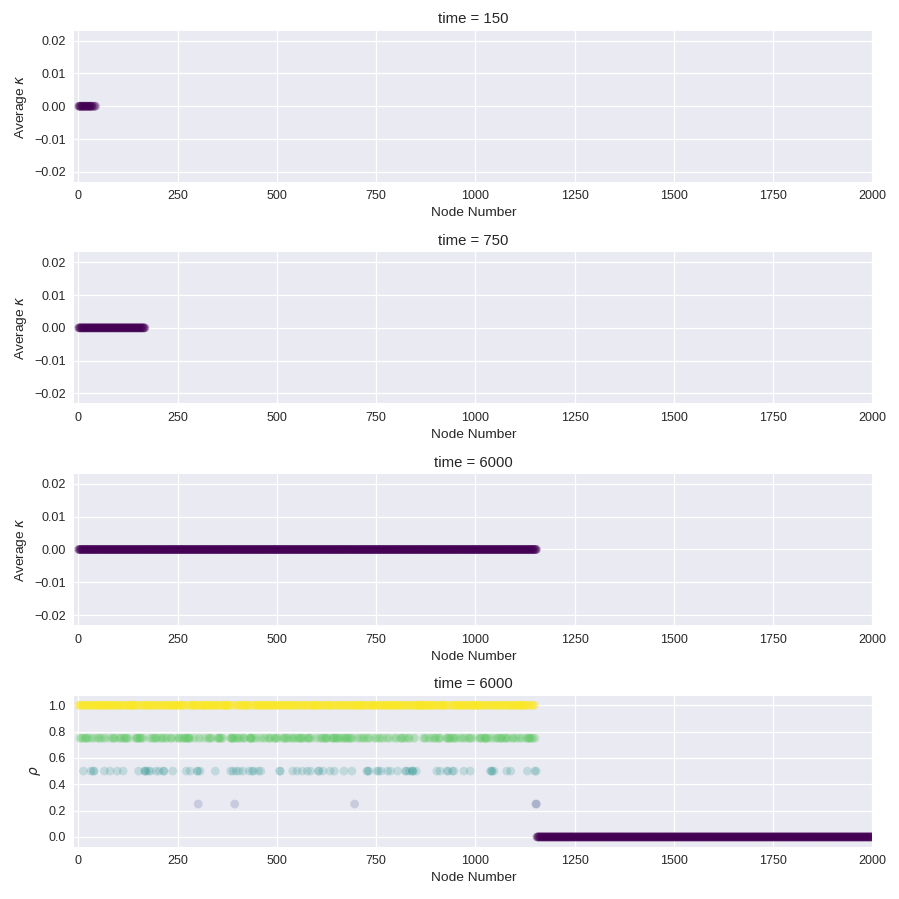

<IPython.core.display.Javascript object>


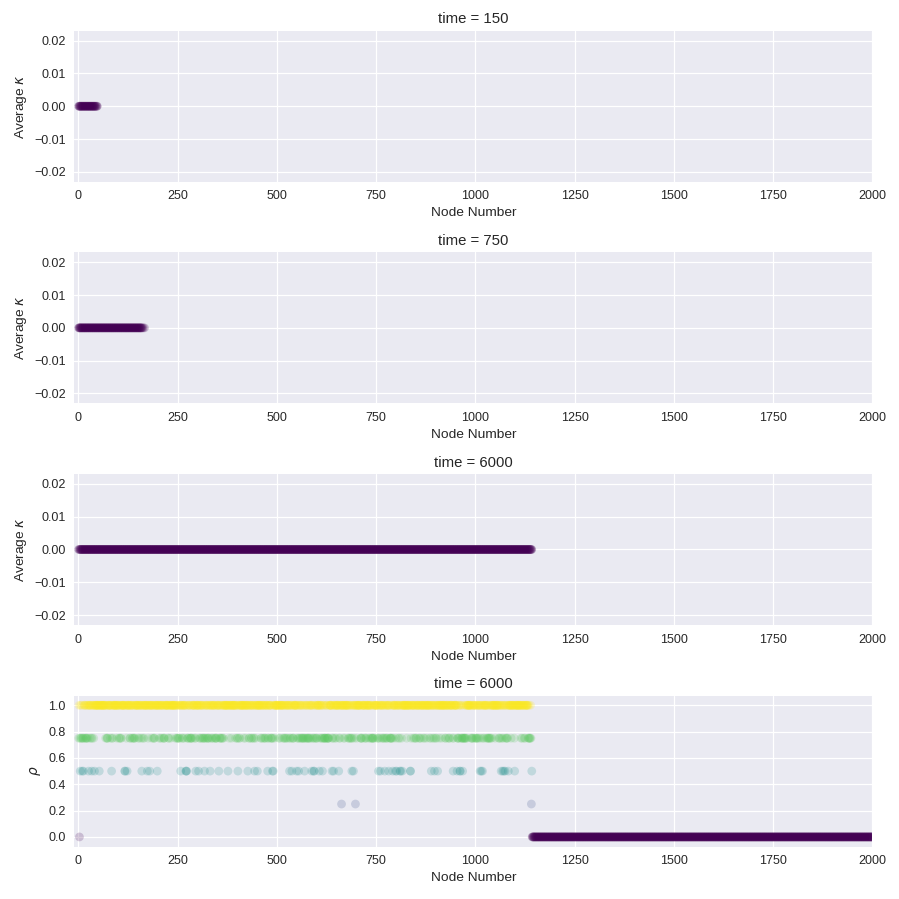

<IPython.core.display.Javascript object>


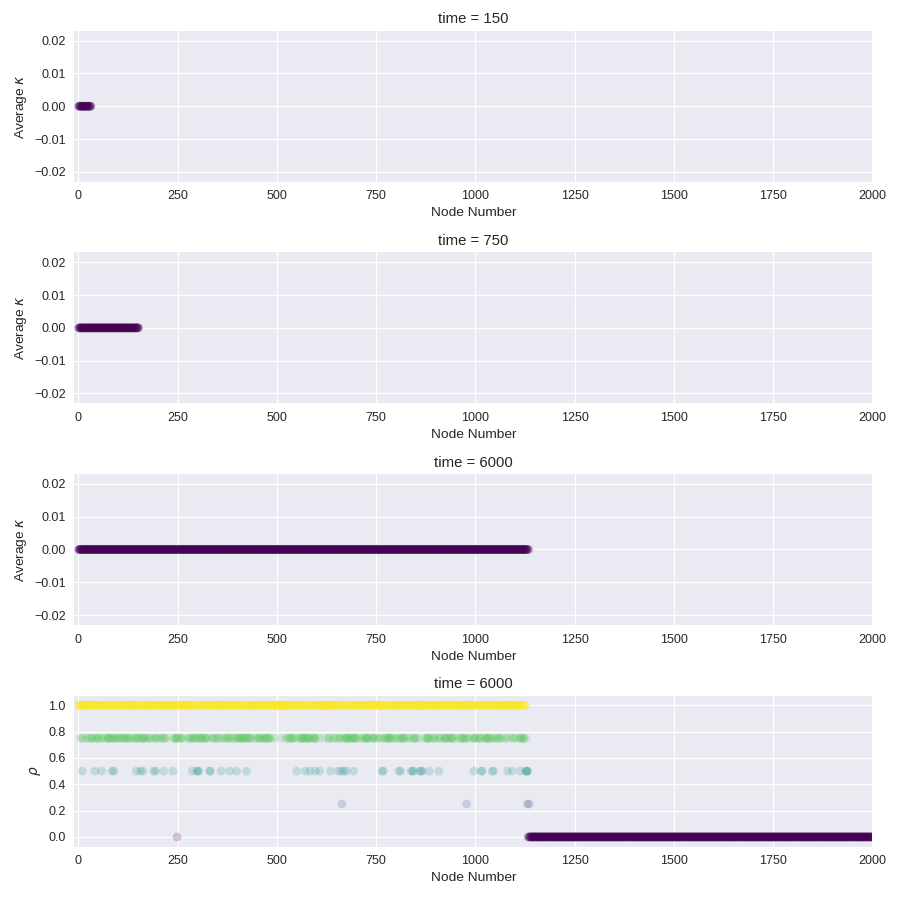

In [6]:
nodes = 1 + np.arange(L, dtype=np.uint) #1,2 .... 2000
plt.style.use('seaborn')
jump_time = 50
tmax = 6000
Runs = 3
for run in range(Runs):
    kappa_stag = np.genfromtxt('output/Evolution Attempt 2 '+strID+'/Run %s/'%str(run+1)+strID + "Evolution of Kappa staggered by %s.csv" %str(jump_time), delimiter = ", " )
    kappa_stag = kappa_stag.reshape([int(tmax/jump_time)+1, Nc, L])
    #theta_stag = np.zeros([tmax-t_save_start+1, L*4])
    theta_stag = np.genfromtxt('output/Evolution Attempt 2 '+strID+'/Run %s/'%str(run+1)+strID + "Evolution of Theta staggered by %s.csv" %str(jump_time), delimiter = ", " )
    theta_stag = theta_stag.reshape([int(tmax/jump_time)+1, Nc, L])
    #nodes_stag = np.zeros([tmax-t_save_start+1, L*4])
    nodes_stag = np.genfromtxt('output/Evolution Attempt 2 '+strID+'/Run %s/'%str(run+1)+strID + "Evolution of Theta staggered by %s.csv" %str(jump_time), delimiter = ", " )
    nodes_stag = nodes_stag.reshape([int(tmax/jump_time)+1, Nc, L])
    
    occupied = nodes_stag.astype(bool)
    mask = 1-occupied
    kappa_stag = np.ma.array(kappa_stag, mask=mask)
    mean_kappa_stag_spatial = kappa_stag.mean(1)
    theta_stag = np.ma.array(theta_stag, mask=mask)
    mean_theta_stag_spatial = theta_stag.mean(1)
    spatial_density_stag = occupied.mean(1)
    
    jump_times = np.arange(0, tmax+jump_time, jump_time, dtype=np.uint)
    #print(jump_times)
    #print(kappa_stag.shape)
    if not os.path.exists('output/Evolution Attempt 2 '+strID+'/Run %s/' %str(run+1)+'specialPlots/'):
        os.makedirs('output/Evolution Attempt 2 '+strID+'/Run %s/' %str(run+1)+'specialPlots/')
    for time in range(1):
        fig, axs = plt.subplots(4,1,figsize=(10, 10))
        #fig.suptitle('Spatial Distribution of Properties', y=1.0)
        axs[0].set_title("time = 150")
        axs[0].scatter(nodes, mean_kappa_stag_spatial[3], c = mean_kappa_stag_spatial[3], cmap='viridis', linewidth=0, alpha=0.2)
        axs[0].set_xlabel('Node Number')
        axs[0].set_ylabel('Average ' + r'$\kappa$')
        axs[0].set_xlim(-10,L)
        #axs[0].set_ylim(-10,10)
        axs[0].grid(True)
        
        axs[1].scatter(nodes, mean_kappa_stag_spatial[15], c = mean_kappa_stag_spatial[15], cmap='viridis', linewidth=0, alpha=0.2)
        axs[1].set_title("time = 750")
        axs[1].set_xlabel('Node Number')
        axs[1].set_ylabel('Average ' + r'$\kappa$')
        axs[1].set_xlim(-10,L)
        #axs[1].set_ylim(-1,1.5)
        axs[1].grid(True)
        
        axs[2].scatter(nodes, mean_kappa_stag_spatial[-1], c = mean_kappa_stag_spatial[-1], cmap='viridis', linewidth=0, alpha=0.2)
        axs[2].set_title("time = 6000")
        axs[2].set_xlabel('Node Number')
        axs[2].set_ylabel('Average ' + r'$\kappa$')
        axs[2].set_xlim(-10,L)
        axs[2].grid(True)
        
        axs[3].scatter(nodes, spatial_density_stag[-1], c = spatial_density_stag[-1], cmap='viridis', linewidth=0, alpha=0.2)
        axs[3].set_title("time = 6000")
        axs[3].set_xlabel('Node Number')
        axs[3].set_ylabel(r'$\rho$')
        axs[3].set_xlim(-10,L)
        axs[3].grid(True)

        fig.tight_layout()
        plt.savefig('output/Evolution Attempt 2 '+strID+'/Run %s/' %str(run+1)+'specialPlots/' + strID +" Spatial Distribution"+'.png')
        #fig.clear()
        #fig.clear()
        #plt.close(fig)
        #plt.show(False)
        #plt.cla()
        #plt.clf()
        #axs.clear()
        #plt.close()

# Ignore